DATA PREPROCESSING - Predicting Solar Installations for Sustainability and Ecological Impact 

In [135]:
#Team members:Bhavana Meravanige, Raksha Ravishankar, Sonia Bathla
#importing all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
#loading the Data Set
solar_data = pd.read_csv(r"C:\HOME\SJSU\Solar_Data\Solar_Footprints_V2_5065925295652909767.csv")

In [137]:
solar_data.head(2)

,OBJECTID,County,Acres,Install Type,Urban or Rural,Combined Class,Distance to Substation (Miles) GTET 100 Max Voltage,Percentile (GTET 100 Max Voltage),Substation Name GTET 100 Max Voltage,HIFLD ID (GTET 100 Max Voltage),...,Percentile (GTET 200 Max Voltage),Substation Name GTET 200 Max Voltage,HIFLD ID (GTET 200 Max Voltage),Distance to Substation (Miles) CAISO,Percentile (CAISO),Substation CASIO Name,HIFLD ID (CAISO),Solar Technoeconomic Intersection,Shape__Area,Shape__Length
0,1,Alameda County,1.672639,Rooftop,Urban,Rooftop - Urban,0.162732,0 to 25th,Dixon Landing,309200.0,...,0 to 25th,Los Esteros,310258.0,2.272283,0 to 25th,Los Esteros,310258.0,Within,6768.954679,365.801336
1,2,Alameda County,1.897078,Rooftop,Urban,Rooftop - Urban,0.226728,0 to 25th,Dixon Landing,309200.0,...,0 to 25th,Los Esteros,310258.0,2.392816,0 to 25th,Los Esteros,310258.0,Within,7677.228982,366.909878


In [138]:
#Re-Naming the Labels
solar_data = solar_data.rename(columns={
    'OBJECTID': 'ID',
    'County': 'County',
    'Acres': 'Acres',
    'Install Type': 'InstallType',
    'Urban or Rural': 'UrbanRural',
    'Combined Class': 'Class',
    'Distance to Substation (Miles) GTET 100 Max Voltage': 'DistSub_100',
    'Percentile (GTET 100 Max Voltage)': 'Percent_100',
    'Substation Name GTET 100 Max Voltage': 'Substation_100',
    'HIFLD ID (GTET 100 Max Voltage)': 'HIFLD_100',
    'Distance to Substation (Miles) GTET 200 Max Voltage': 'DistSub_200',
    'Percentile (GTET 200 Max Voltage)': 'Percent_200',
    'Substation Name GTET 200 Max Voltage': 'Substation_200',
    'HIFLD ID (GTET 200 Max Voltage)': 'HIFLD_200',
    'Distance to Substation (Miles) CAISO': 'DistSub_CAISO',
    'Percentile (CAISO)': 'Percent_CAISO',
    'Substation CASIO Name': 'Substation_CAISO',
    'HIFLD ID (CAISO)': 'HIFLD_CAISO',
    'Solar Technoeconomic Intersection': 'SolarTech',
    'Shape__Area': 'Area',
    'Shape__Length': 'Length'
})

In [139]:
solar_data.head(2)

,ID,County,Acres,InstallType,UrbanRural,Class,DistSub_100,Percent_100,Substation_100,HIFLD_100,...,Percent_200,Substation_200,HIFLD_200,DistSub_CAISO,Percent_CAISO,Substation_CAISO,HIFLD_CAISO,SolarTech,Area,Length
0,1,Alameda County,1.672639,Rooftop,Urban,Rooftop - Urban,0.162732,0 to 25th,Dixon Landing,309200.0,...,0 to 25th,Los Esteros,310258.0,2.272283,0 to 25th,Los Esteros,310258.0,Within,6768.954679,365.801336
1,2,Alameda County,1.897078,Rooftop,Urban,Rooftop - Urban,0.226728,0 to 25th,Dixon Landing,309200.0,...,0 to 25th,Los Esteros,310258.0,2.392816,0 to 25th,Los Esteros,310258.0,Within,7677.228982,366.909878


In [140]:
solar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5397 entries, 0 to 5396
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                5397 non-null   int64  
 1   County            5397 non-null   object 
 2   Acres             5397 non-null   float64
 3   InstallType       5397 non-null   object 
 4   UrbanRural        5397 non-null   object 
 5   Class             5397 non-null   object 
 6   DistSub_100       5397 non-null   float64
 7   Percent_100       5397 non-null   object 
 8   Substation_100    5397 non-null   object 
 9   HIFLD_100         5255 non-null   float64
 10  DistSub_200       5397 non-null   float64
 11  Percent_200       5397 non-null   object 
 12  Substation_200    5397 non-null   object 
 13  HIFLD_200         5165 non-null   float64
 14  DistSub_CAISO     5397 non-null   float64
 15  Percent_CAISO     5397 non-null   object 
 16  Substation_CAISO  5387 non-null   object 


In [141]:
#finding empty entries
solar_data.isnull().sum()

ID                    0
County                0
Acres                 0
InstallType           0
UrbanRural            0
Class                 0
DistSub_100           0
Percent_100           0
Substation_100        0
HIFLD_100           142
DistSub_200           0
Percent_200           0
Substation_200        0
HIFLD_200           232
DistSub_CAISO         0
Percent_CAISO         0
Substation_CAISO     10
HIFLD_CAISO         217
SolarTech             0
Area                  0
Length                0
dtype: int64

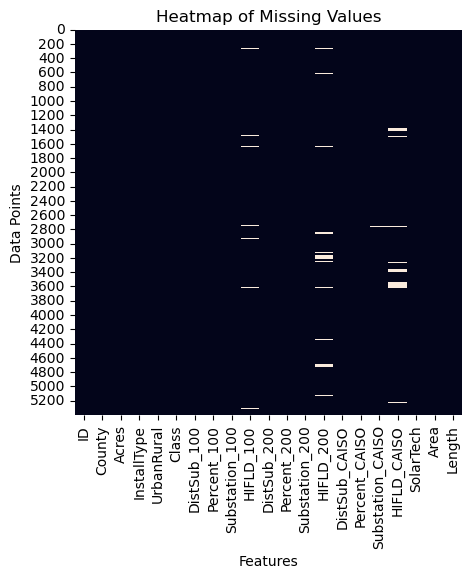

In [142]:
#heatmap to showcase null values
plt.figure(figsize=(5, 5))
sns.heatmap(solar_data.isnull(), cbar=False)

#Adding the labels
plt.title('Heatmap of Missing Values')
plt.xlabel('Features')
plt.ylabel('Data Points')

#Showing the plot
plt.show()

In [143]:
#Handling Missing Values: After careful observations, we decided to remove the null entries. As those entries belonged to HIFLD id groups. Also, overall impact is less. And hence removing the null entries. 
solar_data=solar_data.dropna()

In [144]:
solar_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4926 entries, 0 to 5396
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                4926 non-null   int64  
 1   County            4926 non-null   object 
 2   Acres             4926 non-null   float64
 3   InstallType       4926 non-null   object 
 4   UrbanRural        4926 non-null   object 
 5   Class             4926 non-null   object 
 6   DistSub_100       4926 non-null   float64
 7   Percent_100       4926 non-null   object 
 8   Substation_100    4926 non-null   object 
 9   HIFLD_100         4926 non-null   float64
 10  DistSub_200       4926 non-null   float64
 11  Percent_200       4926 non-null   object 
 12  Substation_200    4926 non-null   object 
 13  HIFLD_200         4926 non-null   float64
 14  DistSub_CAISO     4926 non-null   float64
 15  Percent_CAISO     4926 non-null   object 
 16  Substation_CAISO  4926 non-null   object 
 17  

In [145]:
#checking for duplicate entries
duplicates = solar_data[solar_data.duplicated(subset='ID', keep=False)]

In [146]:
duplicates

,ID,County,Acres,InstallType,UrbanRural,Class,DistSub_100,Percent_100,Substation_100,HIFLD_100,...,Percent_200,Substation_200,HIFLD_200,DistSub_CAISO,Percent_CAISO,Substation_CAISO,HIFLD_CAISO,SolarTech,Area,Length


In [147]:
#Checking the data Consistency
County = solar_data['County'].unique()
County

array(['Alameda County', 'Amador County', 'Butte County',
       'Calaveras County', 'Colusa County', 'Contra Costa County',
       'El Dorado County', 'Fresno County', 'Glenn County',
       'Humboldt County', 'Imperial County', 'Inyo County', 'Kern County',
       'Kings County', 'Lake County', 'Lassen County',
       'Los Angeles County', 'Madera County', 'Marin County',
       'Mendocino County', 'Merced County', 'Mono County',
       'Monterey County', 'Napa County', 'Nevada County', 'Orange County',
       'Placer County', 'Plumas County', 'Riverside County',
       'Sacramento County', 'San Benito County', 'San Bernardino County',
       'San Diego County', 'San Francisco County', 'San Joaquin County',
       'San Luis Obispo County', 'San Mateo County',
       'Santa Barbara County', 'Santa Clara County', 'Santa Cruz County',
       'Shasta County', 'Solano County', 'Sonoma County',
       'Stanislaus County', 'Sutter County', 'Tehama County',
       'Tulare County', 'Tuolumne 

In [148]:
#Removing 'County' keyword in County column
solar_data['County'] = solar_data['County'].str.replace(' County', '', regex=False)

In [149]:
InstallType = solar_data['InstallType'].unique()
InstallType

array(['Rooftop', 'Parking', 'Ground'], dtype=object)

In [150]:
UrbanRural =solar_data['UrbanRural'].unique()
UrbanRural

array(['Urban', 'Rural'], dtype=object)

In [151]:
Class =solar_data['Class'].unique()
Class

array(['Rooftop - Urban', 'Parking - Urban', 'Ground - Urban',
       'Ground - Rural', 'Rooftop - Rural', 'Parking - Rural'],
      dtype=object)

In [152]:
Percent_100 = solar_data['Percent_100'].unique()
Percent_100

array(['0 to 25th', '25th to 50th', '50th to 75th', '75th to 100th'],
      dtype=object)

In [153]:
#Replacing the percentile
replace_dict = {
    '0 to 25th': '0-25',
    '25th to 50th': '25-50',
    '50th to 75th': '50-75',
    '75th to 100th': '75-100'
}

#Replacing multiple items using replace_dict
solar_data['Percent_100'] = solar_data['Percent_100'].replace(replace_dict)
solar_data['Percent_200'] = solar_data['Percent_200'].replace(replace_dict)
solar_data['Percent_CAISO']=solar_data['Percent_CAISO'].replace(replace_dict)

In [154]:
solar_data.head(3)

,ID,County,Acres,InstallType,UrbanRural,Class,DistSub_100,Percent_100,Substation_100,HIFLD_100,...,Percent_200,Substation_200,HIFLD_200,DistSub_CAISO,Percent_CAISO,Substation_CAISO,HIFLD_CAISO,SolarTech,Area,Length
0,1,Alameda,1.672639,Rooftop,Urban,Rooftop - Urban,0.162732,0-25,Dixon Landing,309200.0,...,0-25,Los Esteros,310258.0,2.272283,0-25,Los Esteros,310258.0,Within,6768.954679,365.801336
1,2,Alameda,1.897078,Rooftop,Urban,Rooftop - Urban,0.226728,0-25,Dixon Landing,309200.0,...,0-25,Los Esteros,310258.0,2.392816,0-25,Los Esteros,310258.0,Within,7677.228982,366.909878
2,3,Alameda,1.275783,Rooftop,Urban,Rooftop - Urban,0.426104,0-25,Dixon Landing,309200.0,...,0-25,Los Esteros,310258.0,2.537298,0-25,Los Esteros,310258.0,Within,5162.935990,290.576263


In [155]:
#Checking for data consistency. In depth analysis will be taken care in EDA section. 
Substation_100 = solar_data['Substation_100'].unique()
Substation_100

array(['Dixon Landing', 'Nummi', 'Newark Distribution', 'Newark',
       'Fremont', 'Dumbarton', 'Dumbarton Tap', 'Air Liquide', 'Unknown',
       'Cryogenics', 'Eastshore', 'Las Positas', 'Castro Valley', 'Grant',
       'San Ramon', 'San Leandro U', 'Lawrence Livermore Laboratory',
       'Lawrence Livermore', 'Castro Valley Tap', 'Domtar 2',
       'Domtar #2 Tap', 'Edes', 'Jenney', 'Edes Tap 1', 'Palo Seco',
       'Oakland C', 'Oakland L', 'Oakland D', 'El Cerrito Station G',
       'Rancho Seco', 'Tiger Creek', 'Honcut', 'Wyandotte', 'Tres Vias',
       'Edward C Hyatt', 'Esquon', 'Table Mt.', 'Chico B', 'Notre Dame',
       'Butte', 'Sycamore Creek', 'Nord', 'Camanche Dam', 'Zamora',
       'Homestake', "O'Banion", 'Maxwell',
       'Technical Ecological Services', 'Tassajara', 'Rossmoor Tap 2',
       'Wind Driven', 'Lakewood', 'Rossmoor', 'Standard Oil 1',
       'Lone Tree', 'Standard Oil 3', 'Standard Oil 5', 'Clayton',
       'Meadow Lane', 'Standard Oil 2', 'Point Pinole',

In [156]:
Substation_200 = solar_data['Substation_200'].unique()
Substation_200

array(['Los Esteros', 'Newark Distribution', 'Newark', 'Eastshore',
       'Las Positas', 'Castro Valley', 'San Ramon', 'Lawrence Livermore',
       'Castro Valley Tap', 'Trans Bay Cable Facility', 'Moraga',
       'Embarcadero', 'Sobrante', 'Rancho Seco', 'Tiger Creek', 'Palermo',
       'Table Mt.', 'Edward C Hyatt', 'Glenn', 'Cosumnes', "O'Banion",
       'Maxwell', 'Technical Ecological Services', 'Tassajara',
       'Rossmoor Tap 2', 'Wind Driven', 'Rossmoor', 'Lone Tree', 'Tesoro',
       'Contra Costa', 'Contra Costa Power', 'Pittsburg', 'Tidewater',
       'Bahia', 'Lake', 'White Rock', 'Unknown', 'Helm', 'Mc Mullin',
       'McCall', 'Kearney (New)', 'Pine Flat', 'Panoche', 'Oxford',
       'Herndon', 'Gregg', 'San Luis 3', 'Eastwood', 'Arkansas',
       'Logan Creek', 'Trinity', 'El Centro', 'Bannister', 'Sonora',
       'Ocotillo Express', 'Midway', 'Barren Ridge',
       'Pine Tree Wind Farm', 'Haas', 'Control Gorge', 'Whirlwind',
       'Harper Lake', 'Wind Gap', 'Westwind

In [157]:
Substation_CAISO = solar_data['Substation_CAISO'].unique()
Substation_CAISO

array(['Los Esteros', 'Martin', 'Cayetano', 'Lockeford', 'Placerville',
       'Honcut', 'Wyandotte', 'Thermalito', 'Table Mt.', 'Glenn',
       'Cortina', 'Clayton', 'Brentwood', 'Martinez', 'Carquinez',
       'Lone Tree', 'Contra Costa', 'Pittsburg', 'Gold Hill', 'Gates',
       'Henrietta', 'Schindler', 'Mc Mullin', 'Kingsburg', 'Cantua',
       'McCall', 'Helm', 'Wahtoke', 'Kearney (New)', 'Malaga',
       'West Fresno', 'Sanger', 'California Ave', 'Panoche', 'Newhall',
       'Gregg', 'Oro Loma', 'Big Creek 1', 'Delevan', 'Humboldt',
       'Imperial Valley', 'Bannister', 'Ocotillo Express', 'Inyokern',
       'Springville', 'Inyo', 'Whirlwind', 'Antelope', 'Windhub',
       'Kramer', 'Pastoria', 'Taft', 'Wheeler Ridge', 'Elk Hills',
       'Highwind', 'Norco', 'Tevis', 'Grimmway-Malaga', 'Stockdale',
       'Randsburg', 'Lamont', 'Magunden', 'Bakersfield', 'West Park',
       'Midway', 'Kern Power', 'Tupman', 'Columbus', 'Rio Bravo',
       '7th Standard', 'Kern Oil', 'Cal Water

In [158]:
SolarTech = solar_data['SolarTech'].unique()
SolarTech

array(['Within', 'Outside'], dtype=object)

In [159]:
#Rounding off to 3 decimal places-Mostly would continue with the available data as it showcase original precision.
#solar_data['Acres'] = solar_data['Acres'].round(3)
#solar_data['DistSub_100'] = solar_data['DistSub_100'].round(3)
#solar_data['DistSub_CAISO'] = solar_data['DistSub_CAISO'].round(3)
#solar_data['Area']= solar_data['Area'].round(3)
#solar_data['Length']= solar_data['Length'].round(3)

In [165]:
#changing the float data type of HIFLD to Int data types as they are ID fields.
solar_data['HIFLD_100'] = solar_data['HIFLD_100'].astype(int)
solar_data['HIFLD_200'] = solar_data['HIFLD_200'].astype(int)
solar_data['HIFLD_CAISO'] = solar_data['HIFLD_CAISO'].astype(int)

#converting int64 to int32 for ID field:
solar_data['ID'] = solar_data['ID'].astype('int32')

In [166]:
solar_data.head(3)

,ID,County,Acres,InstallType,UrbanRural,Class,DistSub_100,Percent_100,Substation_100,HIFLD_100,...,Percent_200,Substation_200,HIFLD_200,DistSub_CAISO,Percent_CAISO,Substation_CAISO,HIFLD_CAISO,SolarTech,Area,Length
0,1,Alameda,1.672639,Rooftop,Urban,Rooftop - Urban,0.162732,0-25,Dixon Landing,309200,...,0-25,Los Esteros,310258,2.272283,0-25,Los Esteros,310258,Within,6768.954679,365.801336
1,2,Alameda,1.897078,Rooftop,Urban,Rooftop - Urban,0.226728,0-25,Dixon Landing,309200,...,0-25,Los Esteros,310258,2.392816,0-25,Los Esteros,310258,Within,7677.228982,366.909878
2,3,Alameda,1.275783,Rooftop,Urban,Rooftop - Urban,0.426104,0-25,Dixon Landing,309200,...,0-25,Los Esteros,310258,2.537298,0-25,Los Esteros,310258,Within,5162.935990,290.576263


In [167]:
solar_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4926 entries, 0 to 5396
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                4926 non-null   int32  
 1   County            4926 non-null   object 
 2   Acres             4926 non-null   float64
 3   InstallType       4926 non-null   object 
 4   UrbanRural        4926 non-null   object 
 5   Class             4926 non-null   object 
 6   DistSub_100       4926 non-null   float64
 7   Percent_100       4926 non-null   object 
 8   Substation_100    4926 non-null   object 
 9   HIFLD_100         4926 non-null   int32  
 10  DistSub_200       4926 non-null   float64
 11  Percent_200       4926 non-null   object 
 12  Substation_200    4926 non-null   object 
 13  HIFLD_200         4926 non-null   int32  
 14  DistSub_CAISO     4926 non-null   float64
 15  Percent_CAISO     4926 non-null   object 
 16  Substation_CAISO  4926 non-null   object 
 17  

In [168]:
solar_data.to_csv('C:\HOME\SJSU\Solar_Data\solar_data.csv', index=False) 

In [164]:
#to be continued as per the requirements.